## Validation

```
This notebook compares the results obtained with the class edgelist_perco_t with that obtained with graph_tool.

Copyright (C) 2020  Antoine Allard (antoineallard.info)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
```

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import collections
import sys
sys.path.insert(1, '../src/')
import lcloning
import matplotlib
import matplotlib.pyplot as plt

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans',
                                   'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.fontsize"] = "x-small"

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 5
plt.rcParams["lines.markeredgewidth"] = 1

## Generates the validation data

In [2]:
def extract_degree_distribution(g):
    degrees = dict(collections.Counter(sorted([d for n,d in g.degree()], reverse=True))).items()
    return {key: value / g.number_of_nodes() for (key, value) in degrees}

In [3]:
# Creates a graph, computes some of its properties, and saves its edgelist.
g_ref = nx.random_geometric_graph(100, 0.1)
g_ref_dd = extract_degree_distribution(g_ref)
g_ref_cc = nx.average_clustering(g_ref)
nx.write_edgelist(g_ref, "g_ref_edgelist.dat", delimiter=' ', data=False)

In [4]:
x = []
y = []

for l in np.logspace(np.log10(2), np.log10(250), 10):

    for n in range(25):

        L = int(np.round(l))
        lcloning.save_lcloned_edgelist("g_ref_edgelist.dat", "g_cloned_edgelist.dat", L)
        g_cloned = nx.read_edgelist("g_cloned_edgelist.dat")

        g_cloned_dd = extract_degree_distribution(g_ref)
        if not (g_cloned_dd == g_ref_dd):
            print("A cloned graph does not preserved it's degree distribution.")

        x.append(L)
        y.append(nx.average_clustering(g_cloned))

## Plots the validation figure

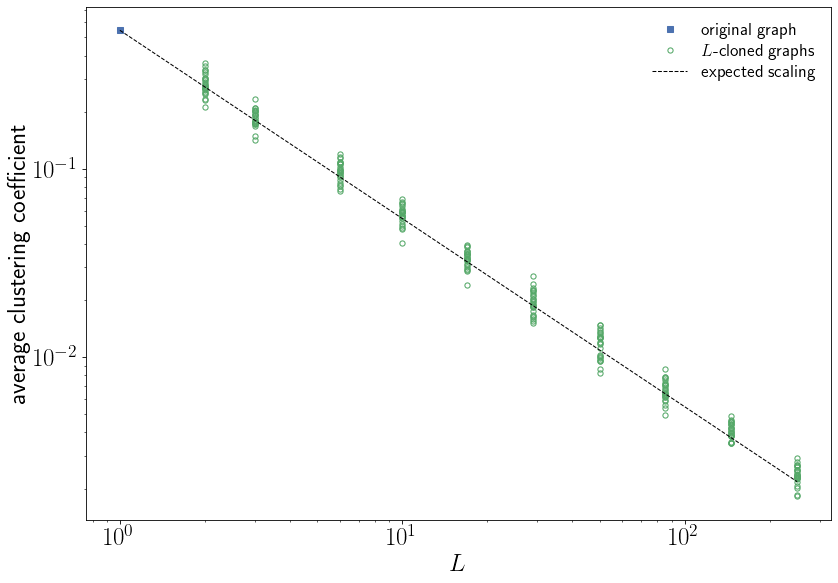

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(1, g_ref_cc,
         linestyle="None", marker="s",
         label=r"original graph")

ax1.plot(x, y,
         linestyle="None", marker="o",
         markerfacecolor="None",
         label=r"$L$-cloned graphs")

ax1.plot([1, max(x)], [g_ref_cc, g_ref_cc / max(x)],
         linestyle="--", marker="None", color="k",
         label=r"expected scaling")

leg = ax1.legend(loc="upper right", labelspacing=0.3)

ax1.set(xlabel=r"$L$", ylabel=r"average clustering coefficient",
        xscale="log", yscale="log")

plt.tight_layout()
plt.show()